# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Visualizations will be shown in the notebook.
%matplotlib inline


# Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
# plot helper
# with help of Patrick Kern

def plot_helper(X, y=None, columns=2, rows=2):
    # define number of images to plot
    number_of_images = columns*rows
    if number_of_images > len(X):
        pass
    
    # choose number_of_images random indexes 
    images_indexes =  np.random.choice(X.shape[0], number_of_images)
    
    # select choosen images
    selected_images = X[images_indexes]
    
    # check for existings labels
    if y is not None:
        labels = y[images_indexes]
    
    #define plot layout
    val, array = plt.subplots(rows, columns, figsize = (10, 4*rows))
    
    # set index
    i = 0
    
    #iterate all plots
    for row in range(rows):
        for column in range(columns):
            
            # check for valid index
            if i >= len(images_indexes):
                break
                
            # set plot of image
            plot = array[row, column] if rows > 1 else array[column]
            #plot.imshow(selected_images[i], vmin = 0, vmax = 255)
            plot.imshow(selected_images[i])
            plot.axis('off')
            
            # add label if existing
            if y is not None:
                plot.set_title('%s' % labels[i], fontsize = 10)
            
            i += 1

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [17]:
### Replace each question mark with the appropriate value.
# Dataset exploration, print stats
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1 #contains 0 - 42 = 43 classes

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

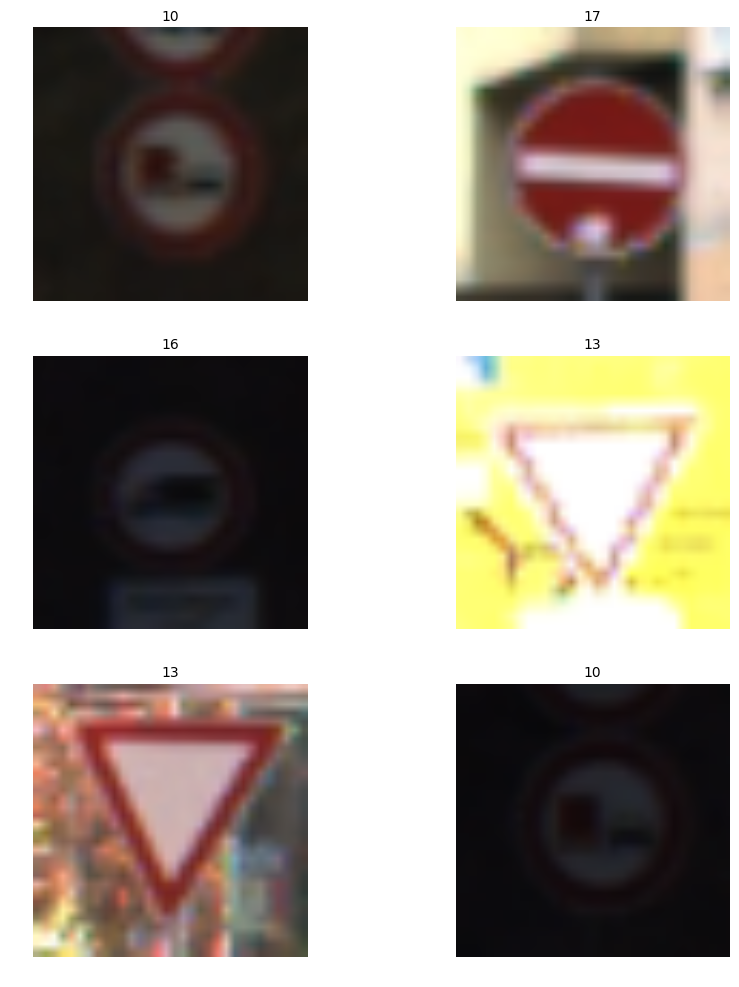

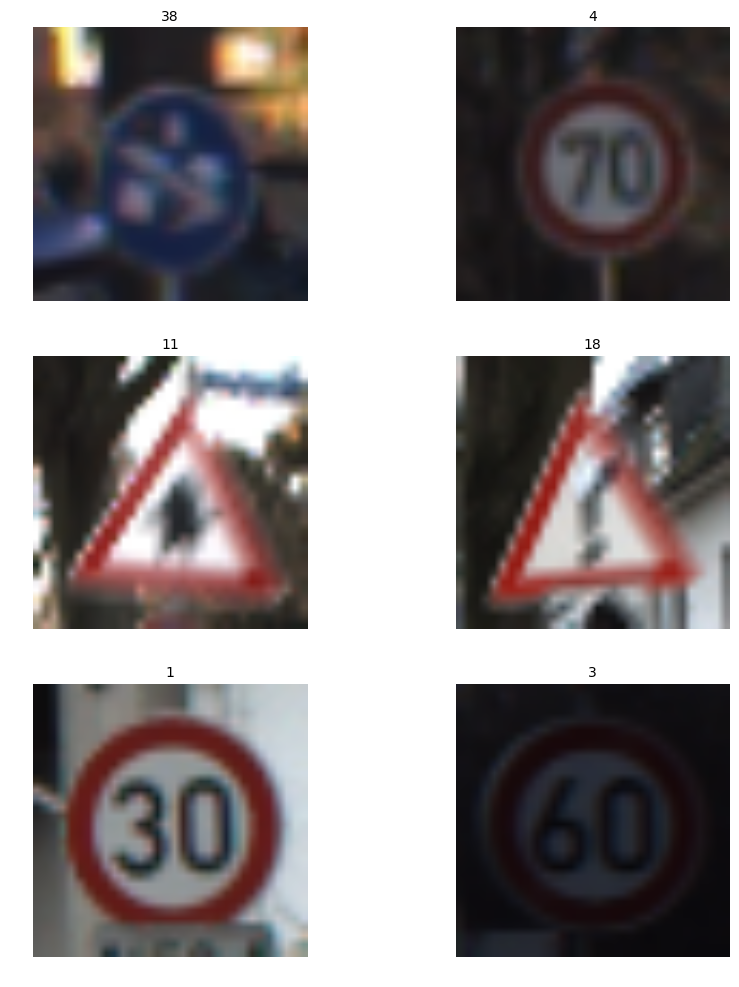

In [18]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# initial plot
#index = random.randint(0, len(X_train))
#image = X_train[index].squeeze()

#plt.figure(figsize=(1,1))
#plt.imshow(image[:, :, 0])
#print(y_train[index])

# advanced plotting
plot_helper(X_train, y_train, 2, 3)
plot_helper(X_test, y_test, 2, 3)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

0
(33, 33, 3)
16 16
(32, 32, 3)
1.21


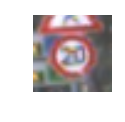

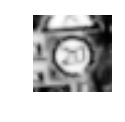

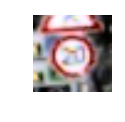

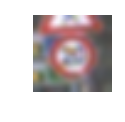

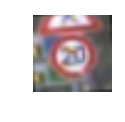

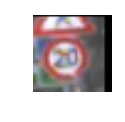

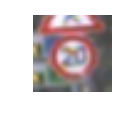

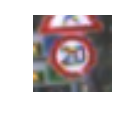

In [19]:
# create image and dataset augmentation functions
"""
for image augmentation
scale values
cv2.convertScaleAbs
use YUV color space
cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
Histogram equalization = normalization of Y, U and V as supposed in Lecun paper
reconversion to RGB for better visualisation

for data set augmentation:
add blur
add random translation
add random scale change
add random lightning changes via gamma value
-> this results in five times bigger data set, which enables to train deeper networks for longer 
-> and enhance robustness to image degradations
"""
# check all image processing on single example first

for i in range(1): 
    print(i)
    # create image from array
    image = X_train[i].squeeze()
    
    plt.figure(figsize=(1,1))
    plt.imshow(image, vmin = 0, vmax = 255)
    plt.axis('off')
    
    # convert to CV_8UC1
    image = cv2.convertScaleAbs(image)
    
    # convert from RGB (matplotlib) to BGR (opencv)
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # convert to grayscale 
    # image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # convert to YUV scale
    image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    
    # print(image_yuv.dtype)
    # print(image_yuv.shape)
    
    # equalize the histogram of the Y channel (luminosity)
    image_y_norm = cv2.equalizeHist(image_yuv[:, :, 0])
    #image_u_norm = cv2.equalizeHist(image_yuv[:, :, 1])
    #image_v_norm = cv2.equalizeHist(image_yuv[:, :, 2])
    
    # check gray scale image
    plt.figure(figsize=(1,1))
    plt.imshow(image_y_norm, cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')
    
    image_u_norm = image_yuv[:, :, 1]
    image_v_norm = image_yuv[:, :, 2]

    # create normalised YUV images
    image_yuv_norm = np.dstack((image_y_norm, image_u_norm, image_v_norm))
    #print(image_yuv_norm.dtype)
    #print(image_yuv_norm.shape)
    
    # reconvert to BGR
    image_bgr_norm = cv2.cvtColor(image_yuv_norm, cv2.COLOR_YUV2RGB)
    
    # convert from BGR (opencv) to RGB (matplotlib) 
    #image_rgb_norm = cv2.cvtColor(image_bgr_norm, cv2.COLOR_BGR2RGB)

    # check result
    plt.figure(figsize=(1,1))
    plt.imshow(image_bgr_norm, vmin = 0, vmax = 255)
    plt.axis('off')
    
    size, size, dim = image.shape
    
    # blur with 5x5 kernel
    image_blur = cv2.blur(image, (3,3))
    
    plt.figure(figsize=(1,1))
    plt.imshow(image_blur, vmin = 0, vmax = 255)
    plt.axis('off')
    
    # Rotation
    ang_rot = np.random.randint(-15, 15) 
    Rot_M = cv2.getRotationMatrix2D((size/2,size/2),ang_rot,1)

    # Translation
    tr_x = np.random.randint(-5, 5)
    tr_y = np.random.randint(-5, 5)
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    image_rot = cv2.warpAffine(image,Rot_M,(size,size))
    plt.figure(figsize=(1,1))
    plt.imshow(image_rot, vmin = 0, vmax = 255)
    plt.axis('off')
    
    image_trans = cv2.warpAffine(image,Trans_M,(size,size))
    plt.figure(figsize=(1,1))
    plt.imshow(image_trans, vmin = 0, vmax = 255)
    plt.axis('off')
    
    # Scaling from 1 to 1.5
    rand_scale = np.random.randint(100, 150) #in percent
    image_scale = cv2.resize(image,None,fx=rand_scale/100, fy=rand_scale/100, interpolation = cv2.INTER_LINEAR)
    center_x, center_y, dim = image_scale.shape
    print(image_scale.shape)
    center_x = np.rint(center_x/2).astype(int)
    center_y = np.rint(center_y/2).astype(int)
    print(center_x, center_y)
    #cropping back to 32x32 from center
    image_scale = image_scale[center_x-16:center_x+16, center_y-16:center_y+16]
    print(image_scale.shape)
    
    plt.figure(figsize=(1,1))
    plt.imshow(image_scale, vmin = 0, vmax = 255)
    plt.axis('off')
    
    #changing lightning -> gamma
    rand_gamma = np.random.randint(25, 175)
    image_gamma = image/255.0
    print(rand_gamma/100)
    image_gamma = cv2.pow(image_gamma, rand_gamma/100)
    image_gamma = np.uint8(image_gamma*255)
    plt.figure(figsize=(1,1))
    plt.imshow(image_gamma, vmin = 0, vmax = 255)
    plt.axis('off')
   

In [20]:
# define image processing as functions
# convert to normalised grayscale by luminosity (normalised Y from YUV) 
def luminosity_transform(X):
    new_array = []
    for i in range(len(X)):
        image = X[i].squeeze()
    
        # convert to CV_8UC1
        image = cv2.convertScaleAbs(image)
    
        # convert to YUV scale
        image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        
        # equalize the histogram of the Y channel (luminosity)
        image_y_norm = cv2.equalizeHist(image_yuv[:, :, 0])
    
        new_array.append(image_y_norm)
        
    new_array = np.array(new_array).reshape((-1,32,32,1))
    return new_array

# add different types of jitter
# adapted from Dennis Chew
# https://carnd-forums.udacity.com/display/CAR/questions/16515861/answers/16516037

def jitter_transform(X, y):
    new_array_X = []
    new_array_y = []
    for i in range(len(X)):
        image = X[i].squeeze()
        size, size, dim = image.shape
        
        # convert to CV_8UC3
        image = cv2.convertScaleAbs(image)
        
        # blur with 3x3 kernel
        # image_blur = cv2.blur(image, (3,3))
        # new_array_X.append(image_blur)
        # new_array_y.append(y[i])
        
        # Rotation from -15 to 15 degree
        ang_rot = np.random.randint(-15, 15) 
        Rot_M = cv2.getRotationMatrix2D((size/2,size/2),ang_rot,1)
        image_rot = cv2.warpAffine(image,Rot_M,(size,size))
        new_array_X.append(image_rot)
        new_array_y.append(y[i])
        
        # Translation from -5 to 5 pixels
        tr_x = np.random.randint(-2, 2)
        tr_y = np.random.randint(-2, 2)
        Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])    
        image_trans = cv2.warpAffine(image,Trans_M,(size,size))
        new_array_X.append(image_trans)
        new_array_y.append(y[i])
        
        # Scaling from 1 to 1.2
        rand_scale = np.random.randint(100, 120) #in percent
        image_scale = cv2.resize(image,None,fx=rand_scale/100, fy=rand_scale/100, interpolation = cv2.INTER_LINEAR)
        center_x, center_y, dim = image_scale.shape
        center_x = np.rint(center_x/2).astype(int)
        center_y = np.rint(center_y/2).astype(int)
        
        #cropping back to 32x32 from center
        image_scale = image_scale[center_x-16:center_x+16, center_y-16:center_y+16]
        new_array_X.append(image_scale)
        new_array_y.append(y[i])
        
        #changing lightning -> gamma
        #rand_gamma = np.random.randint(75, 125)
        #image_gamma = image/255.0
        #image_gamma = cv2.pow(image_gamma, rand_gamma/100)
        #image_gamma = np.uint8(image_gamma*255)
        #new_array_X.append(image_gamma)
        #new_array_y.append(y[i])
        
    # check for correct dimensions
    new_array_X = np.array(new_array_X).reshape((-1,32,32,3))
    new_array_y = np.array(new_array_y).reshape((-1,))
    return new_array_X, new_array_y

def color_transform(X, y):
    new_array_X = []
    new_array_y = []
    for i in range(len(X)): 
        # create image from array
        image = X[i].squeeze()

        # convert to CV_8UC1
        image = cv2.convertScaleAbs(image)

        # convert to YUV scale
        image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

        # equalize the histogram of the Y channel (luminosity)
        image_y_norm = cv2.equalizeHist(image_yuv[:, :, 0])
        #image_u_norm = cv2.equalizeHist(image_yuv[:, :, 1])
        #image_v_norm = cv2.equalizeHist(image_yuv[:, :, 2])

        image_u_norm = image_yuv[:, :, 1]
        image_v_norm = image_yuv[:, :, 2]

        image_yuv_norm = np.dstack((image_y_norm, image_u_norm, image_v_norm))
        
        # reconvert to rgb
        image_rgb_norm = cv2.cvtColor(image_yuv_norm, cv2.COLOR_YUV2RGB)  
        
        new_array_X.append(image_rgb_norm)
        # create updated label array
        new_array_y.append(y[i])
        
    # check for correct dimensions
    new_array_X = np.array(new_array_X).reshape((-1,32,32,3))
    new_array_y = np.array(new_array_y).reshape((-1,))
    return new_array_X, new_array_y      

(39209, 32, 32, 3)
(39209,)
(117627, 32, 32, 3)
(117627,)
(12630, 32, 32, 3)
(12630,)
(12630, 32, 32, 3)
(12630,)


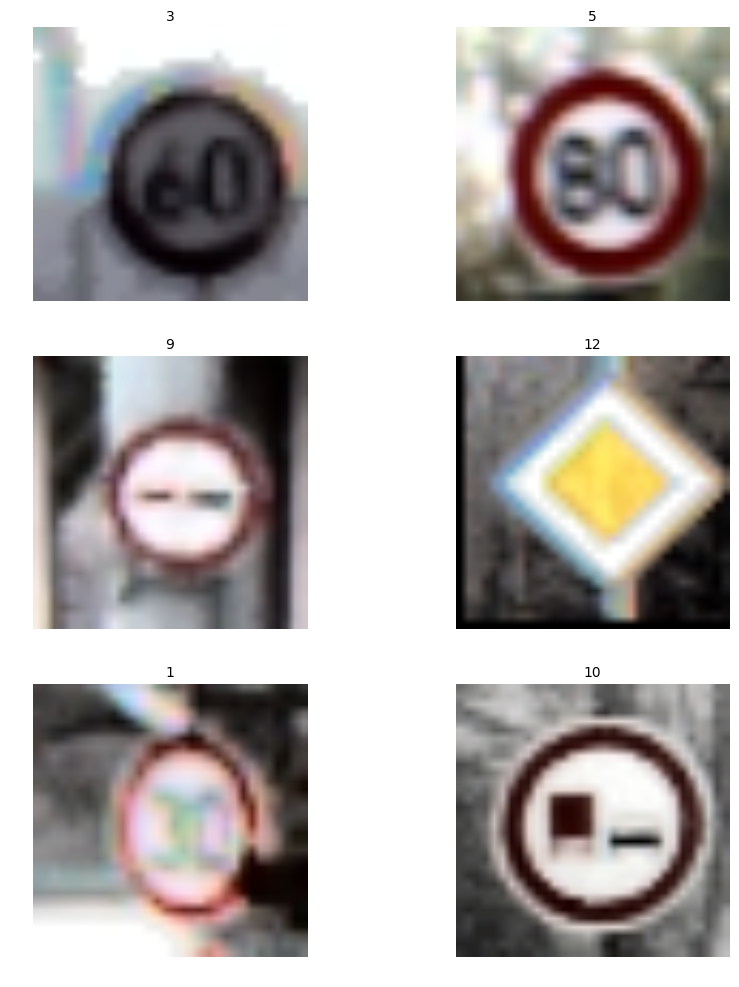

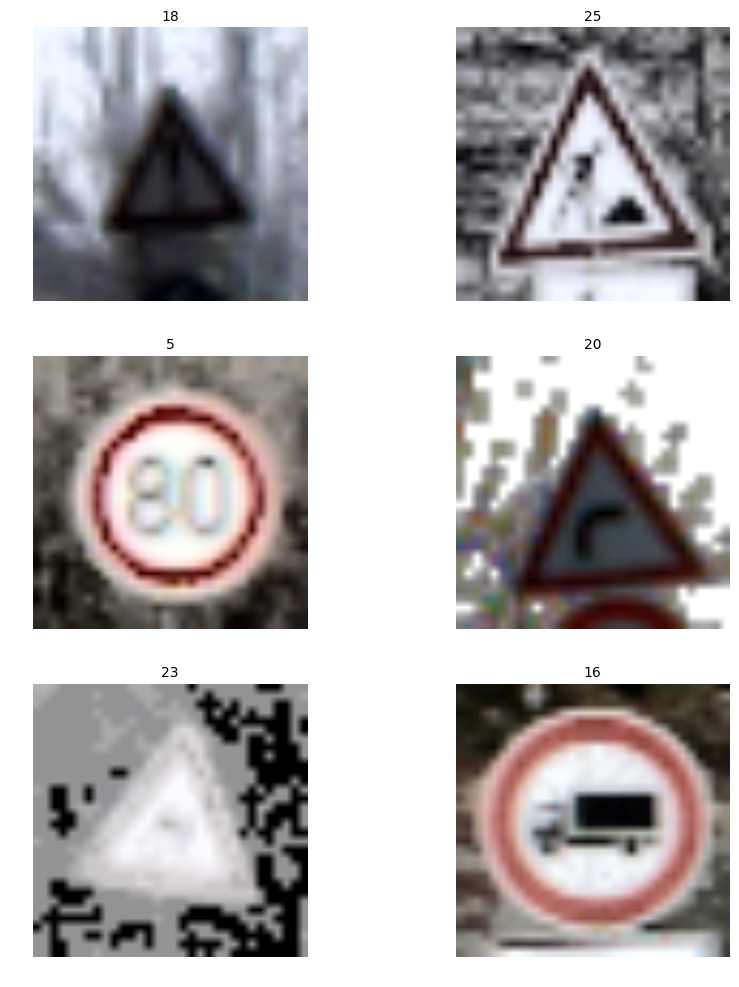

In [21]:
print(X_train.shape)
print(y_train.shape)

# add jitter and enlarge dataset
X_train, y_train = jitter_transform(X_train, y_train)

# apply color conversion to whole dataset
X_train, y_train = color_transform(X_train, y_train)

#check size after augmentation
print(X_train.shape)
print(y_train.shape)

#check test set
print(X_test.shape)
print(y_test.shape)

# jitter not applicable to test data!
# image transformation must be equally applied
#X_jitter_test, y_jitter_test_labels = jitter_transform(X_test, y_test_classes)
X_test, y_test = color_transform(X_test, y_test)

#check size afterwards
print(X_test.shape)
print(y_test.shape)

# evaluate new datasets, everything looks good?
plot_helper(X_train, y_train, 2, 3)
plot_helper(X_test, y_test, 2, 3)

In [23]:
# shuffle the training and validation data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

# Normalize all image to 0-1 range for float after using 0 - 255 range uint
#X_train = X_train/255
#X_test = X_test/255

# create validation dataset with examples from different sequences
X_train, X_validation, y_train, y_validation = train_test_split(
                                                    X_train, 
                                                    y_train,
                                                    test_size=0.2)

# enforce type float32
#X_train = X_train.astype(np.float32)
#X_validation = X_validation.astype(np.float32)
#X_test = X_test.astype(np.float32)

# add class names also to labels in validation        
# process names from csv file
class_names = []
with open('signnames.csv', 'r') as file:
    file_entries = csv.reader(file, delimiter=',')
    next(file_entries, None)
    for entry in file_entries:
        class_names.append(entry[1])

# add class names to labels        
y_train_classes = np.array([class_names[i] for i in y_train])
y_test_classes = np.array([class_names[i] for i in y_test])
y_validation_classes = np.array([class_names[i] for i in y_validation])

Number of training examples = 75280
Number of validation examples = 18821
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


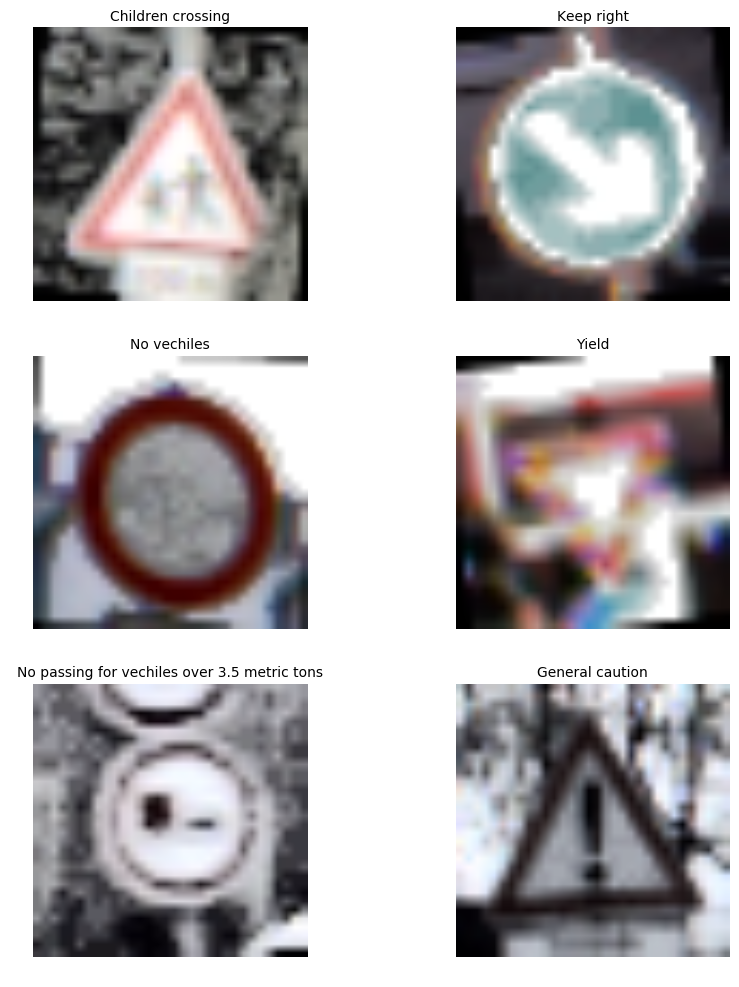

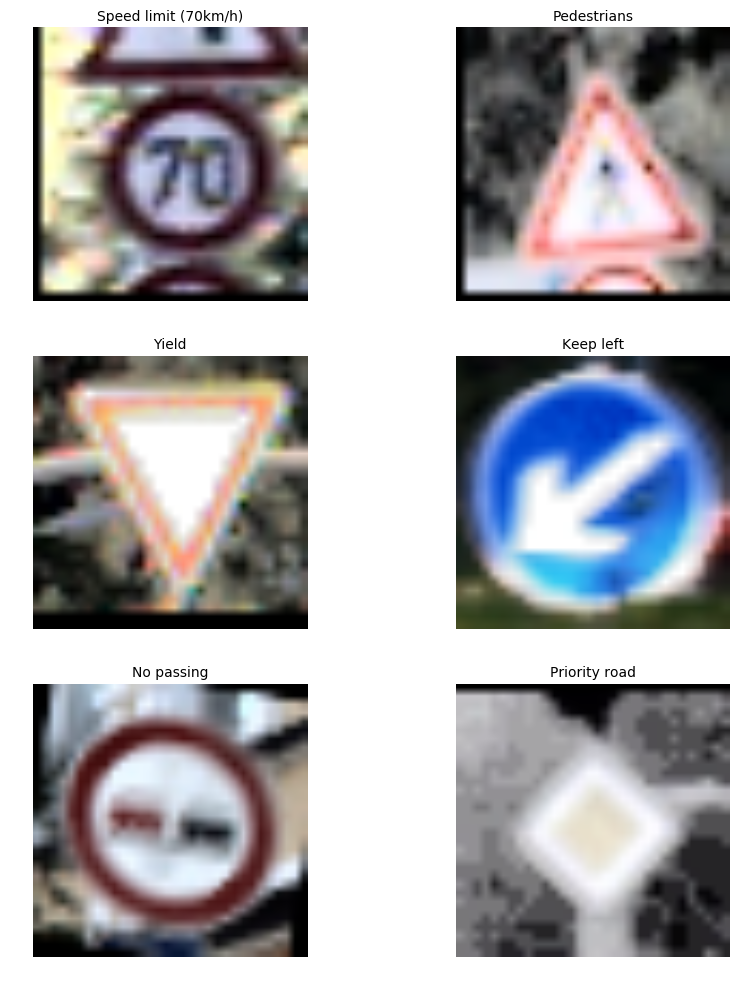

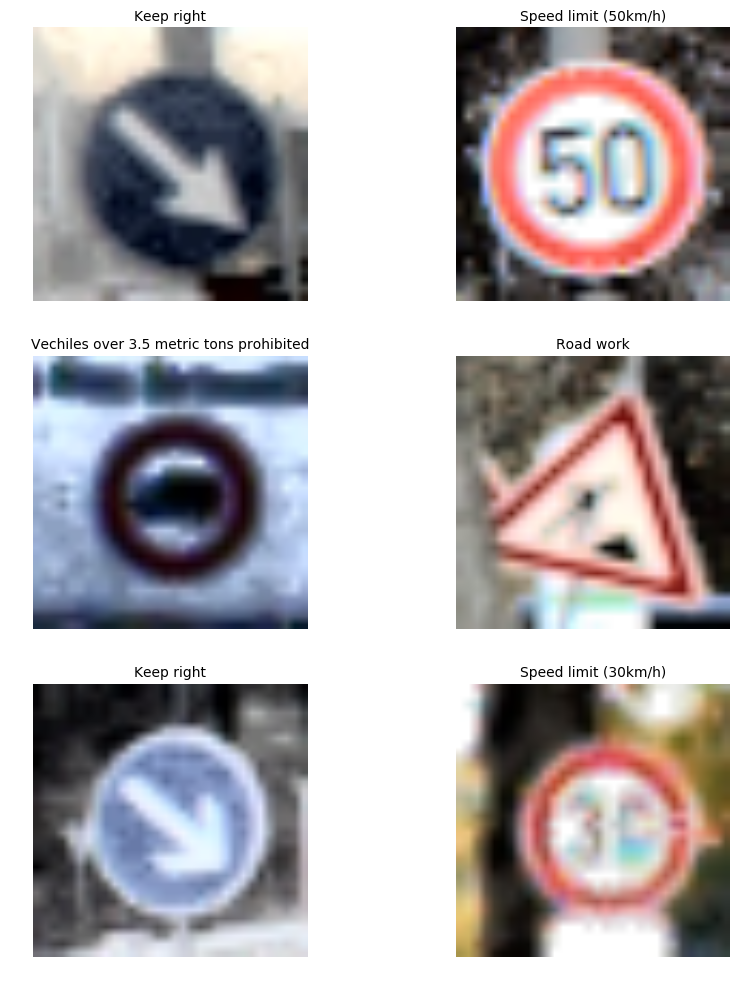

In [24]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Data set exploration (final)

# Number of training examples
n_train = len(X_train)

# Number of training examples
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1 #contains 0 - 42 = 43 classes

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#index = random.randint(0, len(X_train))
#image = X_train[index].squeeze()
#print(image)
#plt.figure(figsize=(1,1))
#plt.imshow(image, cmap="gray")
#print(y_train[index])

plot_helper(X_train, y_train_classes, 2, 3)
plot_helper(X_validation, y_validation_classes, 2, 3)
plot_helper(X_test, y_test_classes, 2, 3)



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

**for image augmentation, properties of images where enhanced:**
- scale values
- cv2.convertScaleAbs
- use YUV color space
- cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
- Histogram equalization = normalization of Y, U and V as supposed in Lecun paper
- reconversion to RGB for better visualisation
- normalisation from 255 to 0 - 1 range with data/255
- use data type float32
- shuffle dataset

**Why**
- YUV space is better suited for detecting contrast, edge etc. in Y channel (luminosity) and seperates the color information from the luminosity -> in RGB brightness, contrast and color are correlated between the channels
- normalization / histogram equalisation enhances the used ranged of values and provides therefore better details
- float is used with normalised values to better suit CNN operations
- shuffling is necessary to discard correlations of images in dataset, as usually the same sign occurs in dataset in a row (due to approaching it while capturing it)
- validation dataset is used to evaluate performance of epochs and evaluate the model

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**for data set augmentation, additional data was created:**
- add blur
- add random translation
- add random scale change
- add random lightning changes via gamma value

**Why**
- this results in five times bigger data set, which enables to train deeper networks for longer 
- bigger data sets with more details enables to set a bigger number of weights / parameters
- and enhance robustness to image degradations, which may occure in test data
- lower overfitting to specific training images

** SOME AUGMENTATION AND PROPROCESSING WAS NOT APPLIED (NORMALISATION/255, float32, Blur, Gamma) were not applied due to Memory issues / errors with to large dataset or execution!

**Architectures:**


### Input
The LeNet-inspired architecture
Deeper with two additional convolutional layers
Using dropout

Architecture Conv Conv Pool Conv Conv Pool FC FC

### Architecture
**Layer 1: Convolutional.** The output shape should be 30x30x32.

**Activation.** RELU

**Layer 2: Convolutional.** The output shape should be 28x28x32.

**Activation.** RELU

**Pooling.** The output shape should be 14x14x32.

**Layer 3: Convolutional.** The output shape should be 12x112x64.

**Activation.** Relu

**Layer 4: Convolutional.** The output shape should be 10x10x64.

**Activation.** Relu

**Pooling.** The output shape should be 5x5x64.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. Output 5x5x64 = 1600

**FC1: Fully Connected.** This should have 1024 outputs.

**Activation.** Relu

**FC2: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [30]:
# Deep LENET with additional convolutional layers and Dropout
# see https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/
from tensorflow.contrib.layers import flatten

n_classes = 43  # German Traffic Sign Data

# Hyperparameters
mu = 0
sigma = 0.1
beta = 0.001

layer_depth = {
    'layer_1': 32, #Output = 30x30x32.
    'layer_2': 32, #Output = 28x28x32
    'layer_3': 64, #Output = 12x12x65
    'layer_4': 64, #Output = 10x10x64
    'layer_5': 1024 #Output 43
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [3, 3, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [3, 3, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [3, 3, layer_depth['layer_2'], layer_depth['layer_3']], mean = mu, stddev = sigma)),
    'layer_4': tf.Variable(tf.truncated_normal(
        [3, 3, layer_depth['layer_3'], layer_depth['layer_4']], mean = mu, stddev = sigma)),
    'layer_5': tf.Variable(tf.truncated_normal(
        [5*5*64, layer_depth['layer_5']], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['layer_5'], n_classes], mean = mu, stddev = sigma))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_depth['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_depth['layer_4'])),
    'layer_5': tf.Variable(tf.zeros(layer_depth['layer_5'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def LeNet(x):    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    # TODO: Activation Relu
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])

    # TODO: Layer 2: Convolutional. Input = 30x30x32 Output = 28x28x32.
    # TODO: Activation Relu
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])

    # TODO: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv2 = maxpool2d(conv2)
        
    # TODO: Layer 2: Convolutional. Input = 14x14x32 Output = 12x12x64.
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])

    # TODO: Layer 2: Convolutional. Input = 12x12x64 Output = 10x10x64. 
    conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    
    # TODO: Pooling. Input = 10x10x64 Output = 5x5x64.
    conv4 = maxpool2d(conv4)
    
    # TODO: Flatten. Input = 5x5x64 Output = 1600x1
    fc0   = flatten(conv4)
    
    # TODO: Layer 3: Fully Connected. Input = 1600 Output = 1024
    fc1 = tf.add(
        tf.matmul(fc0, weights['layer_5']),
        biases['layer_5'])
    
    # TODO: Activation tanh or relu
    fc1 = tf.nn.relu6(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 1024 Output = 43.
    logits = tf.add(
        tf.matmul(fc1, weights['out']),
        biases['out'])
    
    return logits

Use of Lenet from Tensorflow Lab
Using Dropout additionally!

### Input
The LeNet-inspired architecture accepts a 32x32xC image as input, where C is the number of color channels. (used from tensorflow lab)

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Relu

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Relu

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Tanh

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Tanh

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [25]:
# LENET original architecture

from tensorflow.contrib.layers import flatten

n_classes = 43  # German Traffic Sign Data

# Hyperparameters
mu = 0
sigma = 0.1
    
layer_depth = {
    'layer_1': 6, #Output = 28x28x6.
    'layer_2': 16, #Output = 10x10x16
    'layer_3': 120, #Output = 120
    'layer_4': 84
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5*5*16, layer_depth['layer_3']], mean = mu, stddev = sigma)),
    'layer_4': tf.Variable(tf.truncated_normal(
        [layer_depth['layer_3'], layer_depth['layer_4']], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['layer_4'], n_classes], mean = mu, stddev = sigma))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_depth['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_depth['layer_4'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def LeNet(x):    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # TODO: Activation Relu
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)    

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # TODO: Activation Relu
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120
    fc1 = tf.add(
        tf.matmul(fc0, weights['layer_3']),
        biases['layer_3'])
    
    # TODO: Activation.
    fc1 = tf.nn.tanh(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(
        tf.matmul(fc1, weights['layer_4']),
        biases['layer_4'])
    
    # TODO: Activation.
    fc2 = tf.nn.tanh(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(
        tf.matmul(fc2, weights['out']),
        biases['out'])

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

For Architecture Details see above for two examples!
Added Dropout to both networks

Created a deeper Lenet to adjust for augmentated data size of training set and create a better model
Training is very long! (even using GTX 770 GPU ;) at home)

## Features and Labels
Train Network to classify traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
`keep_prob` is used for dropout in training
`one_hot_y` is one hot encoded classes

In [31]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43) #43 classes

## Training Pipeline
Create a training pipeline that uses the model to classify data.


In [32]:
#The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.
# for Deep Lenet use 64 Batchsize and min. 25 Epochs and rate 0.0001
# for Lenet use 128 Batch size and min. 10 Epochs and rate 0.001

EPOCHS = 25 #10
BATCH_SIZE = 64 #128
rate = 0.0001 #0.001

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [34]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.178

EPOCH 2 ...
Validation Accuracy = 0.330

EPOCH 3 ...
Validation Accuracy = 0.460

EPOCH 4 ...
Validation Accuracy = 0.521

EPOCH 5 ...
Validation Accuracy = 0.593

EPOCH 6 ...
Validation Accuracy = 0.651

EPOCH 7 ...
Validation Accuracy = 0.705

EPOCH 8 ...
Validation Accuracy = 0.741

EPOCH 9 ...
Validation Accuracy = 0.775

EPOCH 10 ...
Validation Accuracy = 0.799

EPOCH 11 ...
Validation Accuracy = 0.800

EPOCH 12 ...
Validation Accuracy = 0.835

EPOCH 13 ...
Validation Accuracy = 0.846

EPOCH 14 ...
Validation Accuracy = 0.875

EPOCH 15 ...
Validation Accuracy = 0.879

EPOCH 16 ...
Validation Accuracy = 0.892

EPOCH 17 ...
Validation Accuracy = 0.904

EPOCH 18 ...
Validation Accuracy = 0.914

EPOCH 19 ...
Validation Accuracy = 0.927

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.943

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [120]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.923


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Used Adam optimizer as in Lab
Adjusted hyperparameters for deeper Network (generally smaller, so longer but more succesful training)

- for Deep Lenet use 64 Batchsize and min. 25 Epochs and rate 0.0001
- for Lenet use 128 Batch size and min. 10 Epochs and rate 0.001

- achieved approx. 92 % on validation set in LENET
- achieved approx. 95 % on validation and 92,3 %!! on test set with Deep Lenet

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used the provided Lenet Lab in Tensorflow as a very good starting point
I used the provided paper to achieve data set preprocessing and augmentation
I used known Lenet implementation, especially Tensorflow tutorial Mnist for Experts is very useful
Also introduced Dropout from here
https://www.tensorflow.org/tutorials/mnist/pros/

Deep Architecture is more suitable, as Problem is more difficult than easy MNIST Dataset
Found the architecture as a suggestion on slide 14
http://de.slideshare.net/ssuser06e0c5/explanation-on-tensorflow-example-deep-mnist-for-expert

For the parameters I knew I had to lower the learning rate and use higher number of epochs
Tried different batch size by trial and error

Generally a lot of trial and error... ;)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [59]:
# preprocess images identically
# without labels

def color_transform_test(X):
    new_array_X = []

    for i in range(len(X)): 
        # create image from array
        image = X[i].squeeze()

        # convert to CV_8UC1
        image = cv2.convertScaleAbs(image)

        # convert to YUV scale
        image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

        # equalize the histogram of the Y channel (luminosity)
        image_y_norm = cv2.equalizeHist(image_yuv[:, :, 0])
        #image_u_norm = cv2.equalizeHist(image_yuv[:, :, 1])
        #image_v_norm = cv2.equalizeHist(image_yuv[:, :, 2])

        image_u_norm = image_yuv[:, :, 1]
        image_v_norm = image_yuv[:, :, 2]

        image_yuv_norm = np.dstack((image_y_norm, image_u_norm, image_v_norm))
        
        # reconvert to rgb
        image_rgb_norm = cv2.cvtColor(image_yuv_norm, cv2.COLOR_YUV2RGB)  
        
        new_array_X.append(image_rgb_norm)
        # create updated label array
        
    # check for correct dimensions
    new_array_X = np.array(new_array_X).reshape((-1,32,32,3))
    return new_array_X  

(13, 32, 32, 3)


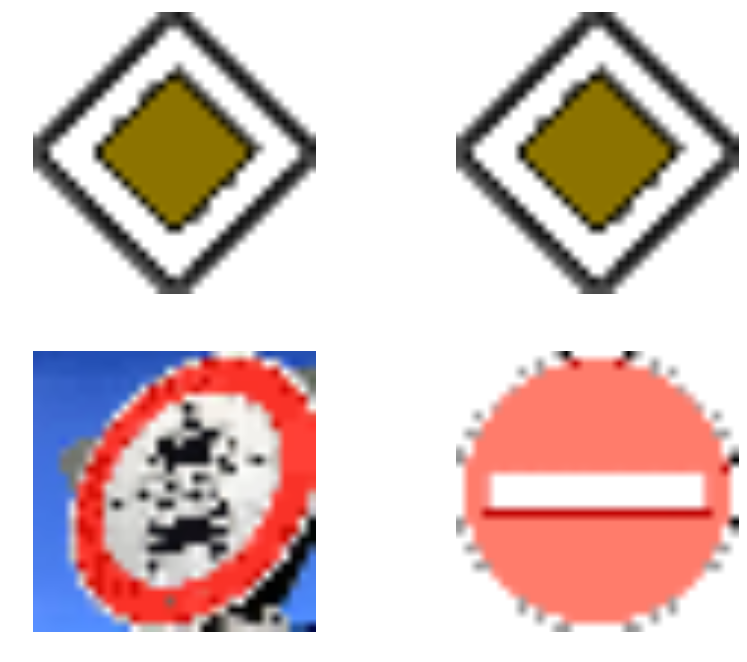

In [92]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
#des = np.array(des,np.float32).reshape(1, len(des))
test_images = []
X_real = []

for image_path in os.listdir("fotos/"):
    #image = mpimg.imread('fotos/'+image_path)
    image =cv2.imread('fotos/'+image_path)
    # Convert them to RGB
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(32,32), interpolation = cv2.INTER_LINEAR)
    image = image.squeeze()
    test_images = np.append(test_images, image)
    
X_real = np.array(test_images).reshape((-1,32,32,3))

X_real = color_transform_test(X_real)
print(X_real.shape)
plot_helper(X_real)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Sample images from traffic signs are correctly classified
Real world examples sometimes fail, sometimes are correct
Plot with classified labels can be seen below

['Road work' 'Yield' 'Ahead only' 'Priority road' 'Yield' 'No vechiles'
 'Stop' 'Speed limit (60km/h)' 'No entry' 'Stop' 'Wild animals crossing'
 'Go straight or left' 'Priority road']


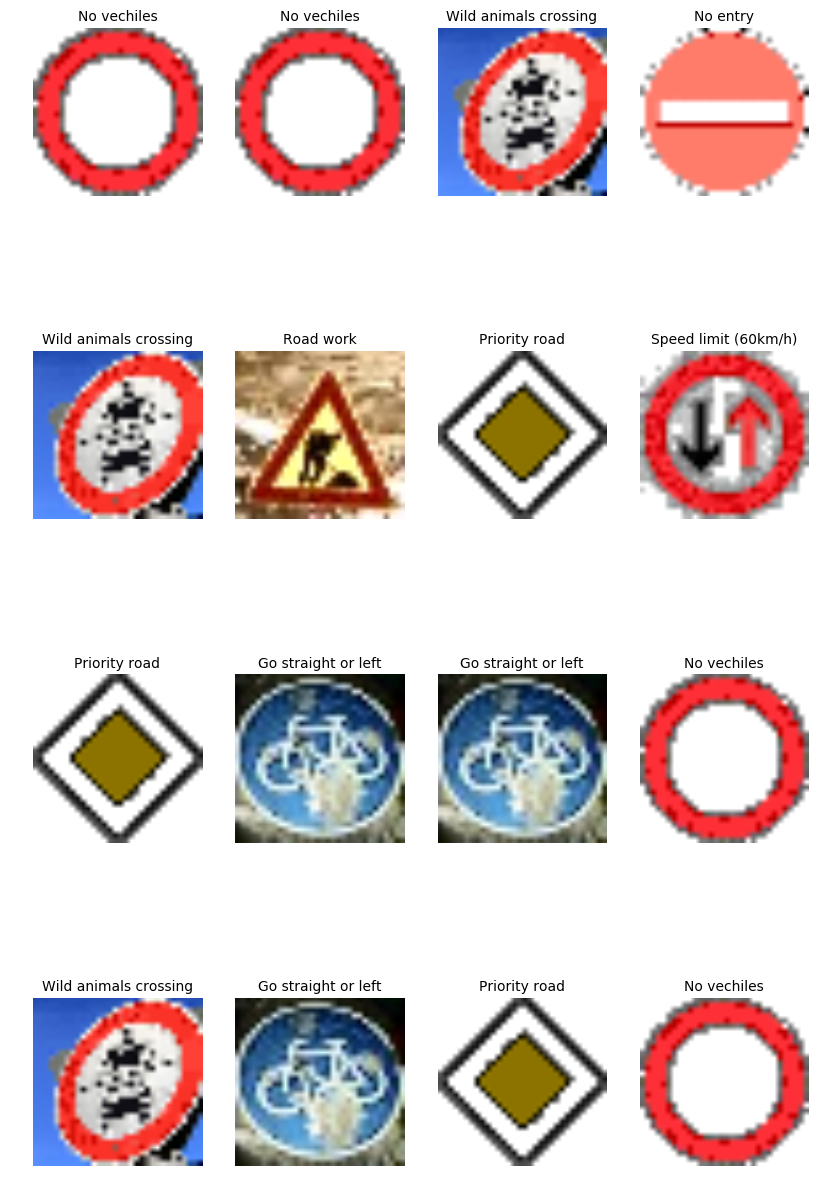

In [99]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    ### Run the predictions here.
    ### Feel free to use as many code cells as needed.
    prediction=tf.argmax(logits,1)
    y_real = prediction.eval(feed_dict={x: X_real, keep_prob: 1.0}, session=sess)

    # add class names also to calculated labels     
    # process names from csv file
    class_names = []
    with open('signnames.csv', 'r') as file:
        file_entries = csv.reader(file, delimiter=',')
        next(file_entries, None)
        for entry in file_entries:
            class_names.append(entry[1])

    # add class names to labels        
    y_real_classes = np.array([class_names[i] for i in y_real])
    print(y_real_classes)
    plot_helper(X_real, y_real_classes, 4, 4)
    #print ("predictions", predicted_labels.eval(feed_dict={x: X_real}, session=sess))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Sample images from traffic signs are correctly classified:
- most of them are easy examples, very common and clear
    - Stop correct
    - Yield correct
    - Priority road correct
    - No vehicles correct
    - No entry correct
    - Narrow Road - wrong
- 5 out of 6 are correct! (compared to test accuracy of

Real world examples sometimes fail, sometimes are correct
- signs might be unknown from training data?
- degradations are strong
- background introduces noise
- different viewing angles and scales are difficult to handes
    - Priority is correct
    - Stop is correct
    - Road work is correct
    - One way is wrong (two signs in one image!)
    - no motorised cars is wrong
    - Pedestrians is wrong
    - Bycicles is wrong
- Total 3 of 7 correct, which is pretty bad! (compared to test accuracy of

Estimated class:  No vechiles
[  4.21211187e-17   1.94610342e-10   7.75373632e-09   7.05124847e-08
   1.15360228e-10   1.55065560e-09   2.22277466e-21   2.85492230e-09
   2.12310813e-09   3.22534837e-12   1.33035400e-17   7.89140851e-19
   8.40765062e-16   4.19387745e-12   5.35277409e-17   9.99999881e-01
   4.07157911e-20   5.55664984e-24   1.01969491e-17   5.51417378e-21
   8.78791389e-16   1.85954185e-16   5.35748161e-21   1.81446139e-19
   1.38182702e-14   4.36445720e-18   6.92476582e-15   3.53406390e-20
   2.73430827e-11   9.59501914e-14   6.66158078e-18   1.16300477e-18
   2.91737798e-13   1.22483344e-14   1.93918812e-15   4.15599850e-15
   6.25759751e-17   4.15695831e-26   1.43046097e-17   2.80407259e-18
   1.46342144e-19   1.61563428e-17   6.22705685e-21]


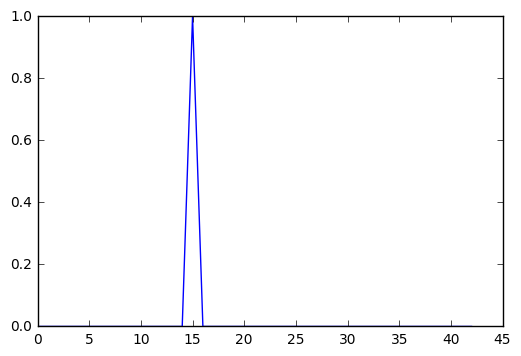

In [126]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import matplotlib.gridspec as gridspec

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_probs = sess.run(softmax, feed_dict={x: X_real, keep_prob: 1.0})
    
    i = np.random.randint(0, len(X_real)) 
    
    print("Estimated class: ",y_real_classes[i])
    print(softmax_probs[i])
    plt.plot(softmax_probs[i])
    

** Answer: **
- as seen for example for No vehicles, a single (correct) class present with a value close to 1 where all other softmax probs are close to zero! -> really confident classification
- incorrect or other classifications show several peaks, with values significantly lower than 1 and higher than 0, which means many different classes are equally confidently estimated. The model is unable to predict accuratly and robustly

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- Some correct predictions have very high confidence even compared to second best (Priority road or stop for examples)
- for wrong examples, correct prediction does not appear in list of top 5, which suggest that the sign is not known in labels / training!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

['Stop' 'No entry' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Bicycles crossing']
[14 17  1  2 29]
[  9.99996662e-01   3.28196256e-06   4.07762997e-08   9.09393533e-11
   2.73757648e-11]


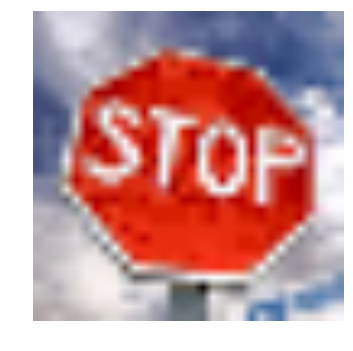

In [119]:
with tf.Session() as sess:
    top_k_predictions = sess.run(tf.nn.top_k(softmax_probs, k=5, sorted=True, name=None))
    top_k_predictions_softmax = top_k_predictions[0]
    top_k_predictions_classes = top_k_predictions[1]
    #print(top_k_predictions_softmax)
    #print(top_k_predictions_classes)
    
    # add class names also to calculated labels     
    # process names from csv file
    class_names = []
    with open('signnames.csv', 'r') as file:
        file_entries = csv.reader(file, delimiter=',')
        next(file_entries, None)
        for entry in file_entries:
            class_names.append(entry[1])
    
    # add class names to labels        
    # show with image together with real class names
    # choose image / index of test image
    i = np.random.randint(0, len(X_real)) 
    if i in range(len(X_real)):
        top_k_predictions_real_classes = np.array([class_names[n] for n in top_k_predictions_classes[i]])
        print(top_k_predictions_real_classes)
        print(top_k_predictions_classes[i])
        print(top_k_predictions_softmax[i])
        plt.imshow(X_real[i])
        plt.axis('off')
    else: print('index out of range')
        
    

Thank you for the project, this was fun and i learned incredibly much, but looking forward to Keras to save time and make programming NN and data augmentation even easier! :)